In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install timecode
!pip install -q py-feat

In [ ]:
import cv2
import glob
import dlib
import ast
import time
from tqdm.notebook import tqdm
import numpy as np
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# df = pd.read_excel('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/Anongrat.xlsx')
df = pd.read_excel('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/Isaree.xlsx')
sourcel = pd.unique(df['แหล่งที่มา']).tolist()
print('sourcel', sourcel)

####  Anongrat
# vdo_01_02 = df.loc[df['แหล่งที่มา'] == '01_02']
# vdo_02_14 = df.loc[df['แหล่งที่มา'] == '02_14']
# vdo_03_29 = df.loc[df['แหล่งที่มา'] == '03_29']
# vdo_04_40 = df.loc[df['แหล่งที่มา'] == '04_40']
# vdo_05_55 = df.loc[df['แหล่งที่มา'] == '05_55']
# vdo_06_81 = df.loc[df['แหล่งที่มา'] == '06_81']

####  Isaree
# df = df.loc[df['แหล่งที่มา'] == '01_002']
# df = df.loc[df['แหล่งที่มา'] == '02_186']

####  Jiratchaya
# df = df.loc[df['แหล่งที่มา'] == '01_02']

####  Kittiya
# df = df.loc[df['แหล่งที่มา'] == '01_02']
# df = df.loc[df['แหล่งที่มา'] == '02_72']

####  Krittika
# df = df.loc[df['แหล่งที่มา'] == '01_02']
# df = df.loc[df['แหล่งที่มา'] == '02_59']
# df = df.loc[df['แหล่งที่มา'] == '03_98']

####  Monsrung
# df = df.loc[df['แหล่งที่มา'] == '01_02']
# df = df.loc[df['แหล่งที่มา'] == '02_68']

####  Wachiraya
# df = df.loc[df['แหล่งที่มา'] == '01_02']
# df = df.loc[df['แหล่งที่มา'] == '02_16']
# df = df.loc[df['แหล่งที่มา'] == '03_152']

####  ปุณณมา
# df = df.loc[df['แหล่งที่มา'] == '01_02']

####  มานาพร
# df = df.loc[df['แหล่งที่มา'] == '01_02']
# df = df.loc[df['แหล่งที่มา'] == '02_21']
# df = df.loc[df['แหล่งที่มา'] == '03_31']
# df = df.loc[df['แหล่งที่มา'] == '04_41']
# df = df.loc[df['แหล่งที่มา'] == '05_83']

df.columns = ['source','time_range','class','persons']
pd.unique(df['class'])

sourcel ['01_002', '02_186']


array(['ผ่อนคลาย', 'มีความสุข', 'neutral', 'เครียด', 'มีความสุุข',
       'เศร้า', 'โกรธ', 'มีความสูข', 'ผ่่อนคลาย', 'มีความสุจ'],
      dtype=object)

# Helper Function

In [ ]:
def caminfo(vdo_name):
  cap = cv2.VideoCapture(vdo_name)
  total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  fps    = cap.get(cv2.CAP_PROP_FPS)
  return total_frames, fps

def get_img(fps, vdo_name, filename):
  # [Anongrat.xlsx, Isaree.xlsx, Jiratchaya.xlsx, Kittiya.xlsx, Krittika.xlsx, Monsrung.xlsx, Wachiraya.xlsx, ปุณณมา.xlsx, มานาพร.xlsx]
  df = pd.read_excel('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/' + filename + '.xlsx')
  print('Shape all data = ', df.shape)

  if filename == 'Anongrat':
    print('filename = ', filename)
    if vdo_name == '01_02':
      df = df.loc[df['แหล่งที่มา'] == '01_02']
    elif vdo_name == '02_14':
      df = df.loc[df['แหล่งที่มา'] == '02_14']
    elif vdo_name == '03_29':
      df = df.loc[df['แหล่งที่มา'] == '03_29']
    elif vdo_name == '04_40':
      df = df.loc[df['แหล่งที่มา'] == '04_40']
    elif vdo_name == '05_55':
      df = df.loc[df['แหล่งที่มา'] == '05_55']
    elif vdo_name == '06_81':
      df = df.loc[df['แหล่งที่มา'] == '06_81']

  if filename == 'Isaree':
    print('filename = ', filename)
    if vdo_name == '01_002':
      df = df.loc[df['แหล่งที่มา'] == '01_002']
    elif vdo_name == '02_186':
      df = df.loc[df['แหล่งที่มา'] == '02_186']

  if filename == 'Jiratchaya':
    print('filename = ', filename)
    if vdo_name == '01_02':
      df = df.loc[df['แหล่งที่มา'] == '01_02']

  if filename == 'Kittiya':
    print('filename = ', filename)
    if vdo_name == '01_02':
      df = df.loc[df['แหล่งที่มา'] == '01_02']
    elif vdo_name == '02_72':
      df = df.loc[df['แหล่งที่มา'] == '02_72']

  if filename == 'Krittika':
    print('filename = ', filename)
    if vdo_name == '01_02':
      df = df.loc[df['แหล่งที่มา'] == '01_02']
    elif vdo_name == '02_59':
      df = df.loc[df['แหล่งที่มา'] == '02_59']
    elif vdo_name == '03_98':
      df = df.loc[df['แหล่งที่มา'] == '03_98']

  if filename == 'Monsrung':
    print('filename = ', filename)
    if vdo_name == '01_02':
      df = df.loc[df['แหล่งที่มา'] == '01_02']
    elif vdo_name == '02_68':
      df = df.loc[df['แหล่งที่มา'] == '02_68']

  if filename == 'Wachiraya':
    print('filename = ', filename)
    if vdo_name == '01_002':
      df = df.loc[df['แหล่งที่มา'] == '01_002']
    elif vdo_name == '02_016':
      df = df.loc[df['แหล่งที่มา'] == '02_016']
    elif vdo_name == '03_152':
      df = df.loc[df['แหล่งที่มา'] == '03_152']

  if filename == 'ปุณณมา':
    print('filename = ', filename)
    if vdo_name == '01_02':
      df = df.loc[df['แหล่งที่มา'] == '01_02']

  if filename == 'มานาพร':
    print('filename = ', filename)
    if vdo_name == '01_02':
      df = df.loc[df['แหล่งที่มา'] == '01_02']
    elif vdo_name == '02_21':
      df = df.loc[df['แหล่งที่มา'] == '02_21']
    elif vdo_name == '03_31':
      df = df.loc[df['แหล่งที่มา'] == '03_31']
    elif vdo_name == '04_41':
      df = df.loc[df['แหล่งที่มา'] == '04_41']
    elif vdo_name == '05_83':
      df = df.loc[df['แหล่งที่มา'] == '05_83']

  df.columns = ['source','time_range','class','persons']

  df["class"].replace({'มีความสุข':'happy','ผ่อนคลาย':'relax',
                    'มีความสุุข': 'happy','เครียด':'stress',
                    'มีความสูข': 'happy', 'ผ่่อนคลาย': 'relax',
                    'มีความสุจ': 'happy','เศร้า':'sad',
                    'โกรธ':'anger','มีีความสุข': 'happy', 'เครีียด': 'stress',
                    'เครียด (จริงจัง)': 'stress', 'มีความสุข (ประหลาดใจ)': 'happy',
                    'อารมณ์โกรธ': 'anger'
                    },inplace=True)
  
  df.reset_index(drop=True, inplace=True)
  df['start'] = df['time_range'].apply(lambda x: x.split("-")[0].strip())
  df['end'] = df['time_range'].apply(lambda x: x.split("-")[1].strip())
  df['start_sec'] = df['start'].apply(lambda x: float(x.split(".")[0].strip())*60 + float(x.split(".")[1].strip()))
  df['end_sec'] = df['end'].apply(lambda x: float(x.split(".")[0].strip())*60 + float(x.split(".")[1].strip()))
  df['start_frame'] = df['start_sec'].apply(lambda x: int(x*fps)) # sec * FPS
  df['end_frame'] = df['end_sec'].apply(lambda x: int(x*fps))
  return df

In [ ]:
# # [Anongrat.xlsx, Isaree.xlsx, Jiratchaya.xlsx, Kittiya.xlsx, Krittika.xlsx, Monsrung.xlsx, Wachiraya.xlsx, ปุณณมา.xlsx, มานาพร.xlsx]
# df = pd.read_excel('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/มานาพร.xlsx')
# sourcel = pd.unique(df['แหล่งที่มา']).tolist()
# # print('sourcel', sourcel)
# df.columns = ['source','time_range','class','persons']
# pd.unique(df['class'])

# 1 Anongrat

In [ ]:
vdo_01_02_row = []
vdo_02_14_row = []
vdo_03_29_row = []
vdo_04_40_row = []
vdo_05_55_row = []
vdo_06_81_row = []
df_fr = pd.DataFrame()
df_raw = pd.DataFrame()

# [Anongrat.xlsx, Isaree.xlsx, Jiratchaya.xlsx, Kittiya.xlsx, Krittika.xlsx, Monsrung.xlsx, Wachiraya.xlsx, ปุณณมา.xlsx, มานาพร.xlsx]
filename = 'Anongrat'

for files in glob.iglob(r'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/' + filename+ '/*.mp4'):
  vdo_name = files[89:94]
  print('vdo name =', vdo_name)
  T_frames, fps = caminfo(files)
  print('FPS = ', fps)
  print('Total Frames = ', T_frames)
  df = get_img(fps, vdo_name, filename)
  print('Shape selected = ', df.shape)

  if vdo_name == '01_02':
    for row in range(df.shape[0]):
      vdo_01_02_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_01_02_mem.append(frame)
      vdo_01_02_row.append([vdo_01_02_mem])
    dict = {'Frames': vdo_01_02_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '02_14':
    for row in range(df.shape[0]):
      vdo_02_14_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_02_14_mem.append(frame)
      vdo_02_14_row.append([vdo_02_14_mem])        
    dict = {'Frames': vdo_02_14_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '03_29':
    for row in range(df.shape[0]):
      vdo_03_29_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_03_29_mem.append(frame)
      vdo_03_29_row.append([vdo_03_29_mem])   
    dict = {'Frames': vdo_03_29_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '04_40':
    for row in range(df.shape[0]):
      vdo_04_40_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_04_40_mem.append(frame)
      vdo_04_40_row.append([vdo_04_40_mem])  
    dict = {'Frames': vdo_04_40_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '05_55':
    for row in range(df.shape[0]):
      vdo_05_55_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_05_55_mem.append(frame)
      vdo_05_55_row.append([vdo_05_55_mem])     
    dict = {'Frames': vdo_05_55_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '06_81':
    for row in range(df.shape[0]):
      vdo_06_81_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_06_81_mem.append(frame)
      vdo_06_81_row.append([vdo_06_81_mem])     
    dict = {'Frames': vdo_06_81_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)
  
  print('########################')
  df_raw = df_raw.append(df)

df_fr.reset_index(drop=True, inplace=True)
df_raw.reset_index(drop=True, inplace=True)
result = pd.concat([df_raw, df_fr], axis=1, join="inner")

print(result)
from google.colab import files
result.to_csv('Anongrat.csv') 
files.download('Anongrat.csv')

# 2 Isaree

In [ ]:
vdo_01_002_row = []
vdo_02_186_row = []
df_frame = pd.DataFrame()
df_raw = pd.DataFrame()
df_fr = pd.DataFrame()

# [Anongrat.xlsx, Isaree.xlsx, Jiratchaya.xlsx, Kittiya.xlsx, Krittika.xlsx, Monsrung.xlsx, Wachiraya.xlsx, ปุณณมา.xlsx, มานาพร.xlsx]
filename = 'Isaree'

for files in glob.iglob(r'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/' + filename+ '/*.mp4'):
  vdo_name = files[87:93]
  print('vdo name =', vdo_name)
  T_frames, fps = caminfo(files)
  print('FPS = ', fps)
  print('Total Frames = ', T_frames)
  df = get_img(fps, vdo_name, filename)
  print('Shape selected = ', df.shape)

  if vdo_name == '01_002':
    for row in range(df.shape[0]):
      vdo_01_002_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_01_002_mem.append(frame)
      vdo_01_002_row.append([vdo_01_002_mem])
    dict = {'Frames': vdo_01_002_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '02_186':
    for row in range(df.shape[0]):
      vdo_02_186_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_02_186_mem.append(frame)
      vdo_02_186_row.append([vdo_02_186_mem])        
    dict = {'Frames': vdo_02_186_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)
  
  print('########################')
  df_raw = df_raw.append(df)

df_fr.reset_index(drop=True, inplace=True)
df_raw.reset_index(drop=True, inplace=True)
result = pd.concat([df_raw, df_fr], axis=1, join="inner")
print(result)

from google.colab import files
result.to_csv('Isaree.csv') 
files.download('Isaree.csv')

vdo name = 01_002
FPS =  59.94005994005994
Total Frames =  93229
Shape all data =  (217, 4)
filename =  Isaree
Shape selected =  (184, 10)
########################
vdo name = 02_186
FPS =  50.0
Total Frames =  40131
Shape all data =  (217, 4)
filename =  Isaree
Shape selected =  (33, 10)
########################
     source  ...                                             Frames
0    01_002  ...  [[599, 600, 601, 602, 603, 604, 605, 606, 607,...
1    01_002  ...  [[3356, 3357, 3358, 3359, 3360, 3361, 3362, 33...
2    01_002  ...  [[4135, 4136, 4137, 4138, 4139, 4140, 4141, 41...
3    01_002  ...  [[5634, 5635, 5636, 5637, 5638, 5639, 5640, 56...
4    01_002  ...  [[5814, 5815, 5816, 5817, 5818, 5819, 5820, 58...
..      ...  ...                                                ...
212  02_186  ...  [[15200, 15201, 15202, 15203, 15204, 15205, 15...
213  02_186  ...  [[15750, 15751, 15752, 15753, 15754, 15755, 15...
214  02_186  ...  [[15850, 15851, 15852, 15853, 15854, 15855, 15...
215  0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 3 Jiratchaya

In [ ]:
vdo_01_002_row = []
df_frame = pd.DataFrame()
df_raw = pd.DataFrame()
df_fr = pd.DataFrame()

# [Anongrat.xlsx, Isaree.xlsx, Jiratchaya.xlsx, Kittiya.xlsx, Krittika.xlsx, Monsrung.xlsx, Wachiraya.xlsx, ปุณณมา.xlsx, มานาพร.xlsx]
filename = 'Jiratchaya'

for files in glob.iglob(r'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/' + filename+ '/*.mp4'):
  vdo_name = files[91:96]
  print('vdo name =', vdo_name)
  T_frames, fps = caminfo(files)
  print('FPS = ', fps)
  print('Total Frames = ', T_frames)
  df = get_img(fps, vdo_name, filename)
  print('Shape selected = ', df.shape)

  if vdo_name == '01_02':
    for row in range(df.shape[0]):
      vdo_01_002_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_01_002_mem.append(frame)
      vdo_01_002_row.append([vdo_01_002_mem])
    dict = {'Frames': vdo_01_002_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)
  
  print('########################')
  df_raw = df_raw.append(df)

df_fr.reset_index(drop=True, inplace=True)
df_raw.reset_index(drop=True, inplace=True)
result = pd.concat([df_raw, df_fr], axis=1, join="inner")
print(result)

from google.colab import files
result.to_csv('jiratchaya.csv') 
files.download('jiratchaya.csv')

vdo name = 01_02
FPS =  25.0
Total Frames =  54752
Shape all data =  (172, 4)
filename =  Jiratchaya
Shape selected =  (172, 10)
########################
    source  ...                                             Frames
0    01_02  ...  [[1525, 1526, 1527, 1528, 1529, 1530, 1531, 15...
1    01_02  ...  [[1650, 1651, 1652, 1653, 1654, 1655, 1656, 16...
2    01_02  ...  [[1800, 1801, 1802, 1803, 1804, 1805, 1806, 18...
3    01_02  ...  [[1900, 1901, 1902, 1903, 1904, 1905, 1906, 19...
4    01_02  ...  [[2075, 2076, 2077, 2078, 2079, 2080, 2081, 20...
..     ...  ...                                                ...
167  01_02  ...  [[28575, 28576, 28577, 28578, 28579, 28580, 28...
168  01_02  ...  [[28650, 28651, 28652, 28653, 28654, 28655, 28...
169  01_02  ...  [[29000, 29001, 29002, 29003, 29004, 29005, 29...
170  01_02  ...  [[29225, 29226, 29227, 29228, 29229, 29230, 29...
171  01_02  ...  [[29325, 29326, 29327, 29328, 29329, 29330, 29...

[172 rows x 11 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# New Section

# 4 Kittiya

In [ ]:
vdo_01_02_row = []
vdo_02_72_row = []
df_frame = pd.DataFrame()
df_raw = pd.DataFrame()
df_fr = pd.DataFrame()

# [Anongrat.xlsx, Isaree.xlsx, Jiratchaya.xlsx, Kittiya.xlsx, Krittika.xlsx, Monsrung.xlsx, Wachiraya.xlsx, ปุณณมา.xlsx, มานาพร.xlsx]
filename = 'Kittiya'

for files in glob.iglob(r'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/' + filename+ '/*.mp4'):
  vdo_name = files[88:93]
  print('vdo name =', vdo_name)
  T_frames, fps = caminfo(files)
  print('FPS = ', fps)
  print('Total Frames = ', T_frames)
  df = get_img(fps, vdo_name, filename)
  print('Shape selected = ', df.shape)

  if vdo_name == '01_02':
    for row in range(df.shape[0]):
      vdo_01_02_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_01_02_mem.append(frame)
      vdo_01_02_row.append([vdo_01_02_mem])
    dict = {'Frames': vdo_01_02_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '02_72':
    for row in range(df.shape[0]):
      vdo_02_72_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_02_72_mem.append(frame)
      vdo_02_72_row.append([vdo_02_72_mem])
    dict = {'Frames': vdo_02_72_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)
  
  print('########################')
  df_raw = df_raw.append(df)

df_fr.reset_index(drop=True, inplace=True)
df_raw.reset_index(drop=True, inplace=True)
result = pd.concat([df_raw, df_fr], axis=1, join="inner")
print(result)

from google.colab import files
result.to_csv('Kittiya.csv') 
files.download('Kittiya.csv')

vdo name = 01_02
FPS =  25.0
Total Frames =  27503
Shape all data =  (145, 4)
filename =  Kittiya
Shape selected =  (70, 10)
########################
vdo name = 02_72
FPS =  29.97002997002997
Total Frames =  24843
Shape all data =  (145, 4)
filename =  Kittiya
Shape selected =  (75, 10)
########################
    source  ...                                             Frames
0    01_02  ...  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...
1    01_02  ...  [[500, 501, 502, 503, 504, 505, 506, 507, 508,...
2    01_02  ...  [[950, 951, 952, 953, 954, 955, 956, 957, 958,...
3    01_02  ...  [[1425, 1426, 1427, 1428, 1429, 1430, 1431, 14...
4    01_02  ...  [[1575, 1576, 1577, 1578, 1579, 1580, 1581, 15...
..     ...  ...                                                ...
140  02_72  ...  [[23646, 23647, 23648, 23649, 23650, 23651, 23...
141  02_72  ...  [[23736, 23737, 23738, 23739, 23740, 23741, 23...
142  02_72  ...  [[24215, 24216, 24217, 24218, 24219, 24220, 24...
143  02_72  ...  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5 Krittika

In [ ]:
vdo_01_02_row = []
vdo_02_59_row = []
vdo_03_98_row = []
df_frame = pd.DataFrame()
df_raw = pd.DataFrame()
df_fr = pd.DataFrame()

# [Anongrat.xlsx, Isaree.xlsx, Jiratchaya.xlsx, Kittiya.xlsx, Krittika.xlsx, Monsrung.xlsx, Wachiraya.xlsx, ปุณณมา.xlsx, มานาพร.xlsx]
filename = 'Krittika'

for files in glob.iglob(r'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/' + filename+ '/*.mp4'):
  vdo_name = files[89:94]
  print('vdo name =', vdo_name)
  T_frames, fps = caminfo(files)
  print('FPS = ', fps)
  print('Total Frames = ', T_frames)
  df = get_img(fps, vdo_name, filename)
  print('Shape selected = ', df.shape)
  
  if vdo_name == '01_02':
    for row in range(df.shape[0]):
      vdo_01_02_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_01_02_mem.append(frame)
      vdo_01_02_row.append([vdo_01_02_mem])
    dict = {'Frames': vdo_01_02_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '02_59':
    for row in range(df.shape[0]):
      vdo_02_59_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_02_59_mem.append(frame)
      vdo_02_59_row.append([vdo_02_59_mem])
    dict = {'Frames': vdo_02_59_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '03_98':
    for row in range(df.shape[0]):
      vdo_03_98_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_03_98_mem.append(frame)
      vdo_03_98_row.append([vdo_03_98_mem])
    dict = {'Frames': vdo_03_98_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)
  
  print('########################')
  df_raw = df_raw.append(df)

df_fr.reset_index(drop=True, inplace=True)
df_raw.reset_index(drop=True, inplace=True)
result = pd.concat([df_raw, df_fr], axis=1, join="inner")
print(result)

from google.colab import files
result.to_csv('Krittika.csv') 
files.download('Krittika.csv')

vdo name = 01_02
FPS =  50.0
Total Frames =  57856
Shape all data =  (98, 4)
filename =  Krittika
Shape selected =  (57, 10)
########################
vdo name = 02_59
FPS =  60.0
Total Frames =  290084
Shape all data =  (98, 4)
filename =  Krittika
Shape selected =  (39, 10)
########################
vdo name = 03_98
FPS =  25.0
Total Frames =  16831
Shape all data =  (98, 4)
filename =  Krittika
Shape selected =  (2, 10)
########################
   source  ...                                             Frames
0   01_02  ...  [[500, 501, 502, 503, 504, 505, 506, 507, 508,...
1   01_02  ...  [[800, 801, 802, 803, 804, 805, 806, 807, 808,...
2   01_02  ...  [[1000, 1001, 1002, 1003, 1004, 1005, 1006, 10...
3   01_02  ...  [[1500, 1501, 1502, 1503, 1504, 1505, 1506, 15...
4   01_02  ...  [[2450, 2451, 2452, 2453, 2454, 2455, 2456, 24...
..    ...  ...                                                ...
93  02_59  ...  [[110820, 110821, 110822, 110823, 110824, 1108...
94  02_59  ...  [[1119

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 6 Monsrung

In [ ]:
vdo_01_02_row = []
vdo_02_68_row = []
df_frame = pd.DataFrame()
df_raw = pd.DataFrame()
df_fr = pd.DataFrame()

# [Anongrat.xlsx, Isaree.xlsx, Jiratchaya.xlsx, Kittiya.xlsx, Krittika.xlsx, Monsrung.xlsx, Wachiraya.xlsx, ปุณณมา.xlsx, มานาพร.xlsx]
filename = 'Monsrung'

for files in glob.iglob(r'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/' + filename+ '/*.mp4'):

  vdo_name = files[89:94]
  print('vdo name =', vdo_name)
  T_frames, fps = caminfo(files)
  print('FPS = ', fps)
  print('Total Frames = ', T_frames)
  df = get_img(fps, vdo_name, filename)
  print('Shape selected = ', df.shape)

  if vdo_name == '01_02':
    for row in range(df.shape[0]):
      vdo_01_02_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_01_02_mem.append(frame)
      vdo_01_02_row.append([vdo_01_02_mem])
    dict = {'Frames': vdo_01_02_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '02_68':
    for row in range(df.shape[0]):
      vdo_02_68_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_02_68_mem.append(frame)
      vdo_02_68_row.append([vdo_02_68_mem])
    dict = {'Frames': vdo_02_68_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)
  
  print('########################')
  df_raw = df_raw.append(df)

df_fr.reset_index(drop=True, inplace=True)
df_raw.reset_index(drop=True, inplace=True)
result = pd.concat([df_raw, df_fr], axis=1, join="inner")
print(result)

from google.colab import files
result.to_csv('Monsrung.csv') 
files.download('Monsrung.csv')

vdo name = 01_02
FPS =  25.0
Total Frames =  15216
Shape all data =  (192, 4)
filename =  Monsrung
Shape selected =  (65, 10)
########################
vdo name = 02_68
FPS =  25.0
Total Frames =  35480
Shape all data =  (192, 4)
filename =  Monsrung
Shape selected =  (127, 10)
########################
    source  ...                                             Frames
0    01_02  ...  [[800, 801, 802, 803, 804, 805, 806, 807, 808,...
1    01_02  ...  [[900, 901, 902, 903, 904, 905, 906, 907, 908,...
2    01_02  ...  [[1025, 1026, 1027, 1028, 1029, 1030, 1031, 10...
3    01_02  ...  [[1100, 1101, 1102, 1103, 1104, 1105, 1106, 11...
4    01_02  ...  [[1700, 1701, 1702, 1703, 1704, 1705, 1706, 17...
..     ...  ...                                                ...
187  02_68  ...  [[34225, 34226, 34227, 34228, 34229, 34230, 34...
188  02_68  ...  [[34425, 34426, 34427, 34428, 34429, 34430, 34...
189  02_68  ...  [[34625, 34626, 34627, 34628, 34629, 34630, 34...
190  02_68  ...  [[34675, 3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 7 Wachiraya

In [ ]:
vdo_01_002_row = []
vdo_02_016_row = []
vdo_03_152_row = []
df_frame = pd.DataFrame()
df_raw = pd.DataFrame()
df_fr = pd.DataFrame()

# [Anongrat.xlsx, Isaree.xlsx, Jiratchaya.xlsx, Kittiya.xlsx, Krittika.xlsx, Monsrung.xlsx, Wachiraya.xlsx, ปุณณมา.xlsx, มานาพร.xlsx]
filename = 'Wachiraya'

for files in glob.iglob(r'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/' + filename+ '/*.mp4'):
  vdo_name = files[90:96]
  print('vdo name =', vdo_name)
  T_frames, fps = caminfo(files)
  print('FPS = ', fps)
  print('Total Frames = ', T_frames)
  df = get_img(fps, vdo_name, filename)
  print('Shape selected = ', df.shape)

  if vdo_name == '01_002':
    for row in range(df.shape[0]):
      vdo_01_002_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_01_002_mem.append(frame)
      vdo_01_002_row.append([vdo_01_002_mem])
    dict = {'Frames': vdo_01_002_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '02_016':
    for row in range(df.shape[0]):
      vdo_02_016_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_02_016_mem.append(frame)
      vdo_02_016_row.append([vdo_02_016_mem])
    dict = {'Frames': vdo_02_016_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '03_152':
    for row in range(df.shape[0]):
      vdo_03_152_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_03_152_mem.append(frame)
      vdo_03_152_row.append([vdo_03_152_mem])
    dict = {'Frames': vdo_03_152_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  print('########################')
  df_raw = df_raw.append(df)

df_fr.reset_index(drop=True, inplace=True)
df_raw.reset_index(drop=True, inplace=True)
result = pd.concat([df_raw, df_fr], axis=1, join="inner")
print(result)

from google.colab import files
result.to_csv('Wachiraya.csv') 
files.download('Wachiraya.csv')

vdo name = 01_002
FPS =  23.976023976023978
Total Frames =  12484
Shape all data =  (159, 4)
filename =  Wachiraya
Shape selected =  (14, 10)
########################
vdo name = 02_016
FPS =  25.0
Total Frames =  28211
Shape all data =  (159, 4)
filename =  Wachiraya
Shape selected =  (136, 10)
########################
vdo name = 03_152
FPS =  25.0
Total Frames =  5781
Shape all data =  (159, 4)
filename =  Wachiraya
Shape selected =  (9, 10)
########################
     source  ...                                             Frames
0    01_002  ...  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...
1    01_002  ...  [[2565, 2566, 2567, 2568, 2569, 2570, 2571, 25...
2    01_002  ...  [[5346, 5347, 5348, 5349, 5350, 5351, 5352, 53...
3    01_002  ...  [[6545, 6546, 6547, 6548, 6549, 6550, 6551, 65...
4    01_002  ...  [[6713, 6714, 6715, 6716, 6717, 6718, 6719, 67...
..      ...  ...                                                ...
154  03_152  ...  [[2450, 2451, 2452, 2453, 2454, 24

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 8 ปุณณมา

In [ ]:
vdo_01_02_row = []
df_frame = pd.DataFrame()
df_raw = pd.DataFrame()
df_fr = pd.DataFrame()

# [Anongrat.xlsx, Isaree.xlsx, Jiratchaya.xlsx, Kittiya.xlsx, Krittika.xlsx, Monsrung.xlsx, Wachiraya.xlsx, ปุณณมา.xlsx, มานาพร.xlsx]
filename = 'ปุณณมา'

for files in glob.iglob(r'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/' + filename+ '/*.mp4'):
  vdo_name = files[87:92]
  print('vdo name =', vdo_name)
  T_frames, fps = caminfo(files)
  print('FPS = ', fps)
  print('Total Frames = ', T_frames)
  df = get_img(fps, vdo_name, filename)
  print('Shape selected = ', df.shape)

  if vdo_name == '01_02':
    for row in range(df.shape[0]):
      vdo_01_02_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_01_02_mem.append(frame)
      vdo_01_02_row.append([vdo_01_02_mem])
    dict = {'Frames': vdo_01_02_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  print('########################')
  df_raw = df_raw.append(df)

df_fr.reset_index(drop=True, inplace=True)
df_raw.reset_index(drop=True, inplace=True)
result = pd.concat([df_raw, df_fr], axis=1, join="inner")
print(result)

from google.colab import files
result.to_csv('ปุณณมา.csv') 
files.download('ปุณณมา.csv')

vdo name = 01_02
FPS =  29.97002997002997
Total Frames =  91782
Shape all data =  (175, 4)
filename =  ปุณณมา
Shape selected =  (175, 10)
########################
    source  ...                                             Frames
0    01_02  ...  [[4585, 4586, 4587, 4588, 4589, 4590, 4591, 45...
1    01_02  ...  [[5334, 5335, 5336, 5337, 5338, 5339, 5340, 53...
2    01_02  ...  [[5604, 5605, 5606, 5607, 5608, 5609, 5610, 56...
3    01_02  ...  [[6053, 6054, 6055, 6056, 6057, 6058, 6059, 60...
4    01_02  ...  [[6413, 6414, 6415, 6416, 6417, 6418, 6419, 64...
..     ...  ...                                                ...
170  01_02  ...  [[56373, 56374, 56375, 56376, 56377, 56378, 56...
171  01_02  ...  [[56463, 56464, 56465, 56466, 56467, 56468, 56...
172  01_02  ...  [[57302, 57303, 57304, 57305, 57306, 57307, 57...
173  01_02  ...  [[57392, 57393, 57394, 57395, 57396, 57397, 57...
174  01_02  ...  [[57542, 57543, 57544, 57545, 57546, 57547, 57...

[175 rows x 11 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 9 มานาพร

In [ ]:
vdo_01_02_row = []
vdo_02_21_row = []
vdo_03_31_row = []
vdo_04_41_row = []
vdo_05_83_row = []

df_frame = pd.DataFrame()
df_raw = pd.DataFrame()
df_fr = pd.DataFrame()

# [Anongrat.xlsx, Isaree.xlsx, Jiratchaya.xlsx, Kittiya.xlsx, Krittika.xlsx, Monsrung.xlsx, Wachiraya.xlsx, ปุณณมา.xlsx, มานาพร.xlsx]
filename = 'มานาพร'

for files in glob.iglob(r'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/' + filename+ '/*.mp4'):
  vdo_name = files[87:92]
  print('vdo name =', vdo_name)
  T_frames, fps = caminfo(files)
  print('FPS = ', fps)
  print('Total Frames = ', T_frames)
  df = get_img(fps, vdo_name, filename)
  print('Shape selected = ', df.shape)

  if vdo_name == '01_02':
    for row in range(df.shape[0]):
      vdo_01_02_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_01_02_mem.append(frame)
      vdo_01_02_row.append([vdo_01_02_mem])
    dict = {'Frames': vdo_01_02_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '02_21':
    for row in range(df.shape[0]):
      vdo_02_21_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_02_21_mem.append(frame)
      vdo_02_21_row.append([vdo_02_21_mem])
    dict = {'Frames': vdo_02_21_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '03_31':
    for row in range(df.shape[0]):
      vdo_03_31_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_03_31_mem.append(frame)
      vdo_03_31_row.append([vdo_03_31_mem])
    dict = {'Frames': vdo_03_31_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '04_41':
    for row in range(df.shape[0]):
      vdo_04_41_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_04_41_mem.append(frame)
      vdo_04_41_row.append([vdo_04_41_mem])
    dict = {'Frames': vdo_04_41_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  elif vdo_name == '05_83':
    for row in range(df.shape[0]):
      vdo_05_83_mem = []
      for frame in range(df['start_frame'][row], df['end_frame'][row]+1):
        vdo_05_83_mem.append(frame)
      vdo_05_83_row.append([vdo_05_83_mem])
    dict = {'Frames': vdo_05_83_row} 
    frame_df = pd.DataFrame(dict)
    df_fr = df_fr.append(frame_df)

  print('########################')
  df_raw = df_raw.append(df)

df_fr.reset_index(drop=True, inplace=True)
df_raw.reset_index(drop=True, inplace=True)
result = pd.concat([df_raw, df_fr], axis=1, join="inner")
print(result)

from google.colab import files
result.to_csv('มานาพร.csv') 
files.download('มานาพร.csv')

# **Test**

In [ ]:
def get_landmarks(image):
    data={}
    detections = detector(image, 1)
    for k,d in enumerate(detections): #For all detected face instances individually
        shape = predictor(image, d) #Draw Facial Landmarks with the predictor class
        xlist = []
        ylist = []
        for i in range(1,68): #Store X and Y coordinates in two lists
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
        # calculate the center of gravity
        xmean = np.mean(xlist)
        ymean = np.mean(ylist)
        # calculate the distance from center from both axis.
        # this information is used to get the angle relative to center point.
        xcentral = [(x-xmean) for x in xlist]
        ycentral = [(y-ymean) for y in ylist]
        landmarks_vectorised = []
        for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
            # append x and y values
            landmarks_vectorised.append(w)
            landmarks_vectorised.append(z)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((z,w))
            # calculate the euclidiean distance from center
            dist = np.linalg.norm(coornp-meannp)
            # append the distance to the feature vector
            landmarks_vectorised.append(dist)
            # apend the angle relative to the center of gravity.
            landmarks_vectorised.append(math.degrees(math.atan2(y,x)))
        data['landmarks_vectorised'] = landmarks_vectorised
    if len(detections) < 1:
        data['landmarks_vestorised'] = "error"
    return data

In [ ]:
# from feat import Detector
face_model = "MTCNN" #MTCNN
landmark_model = "PFLD" #PFLD
au_model = "rf" # JAANET, DRML, logistic, svm, rf
emotion_model = "resmasknet"
detector = Detector(face_model = face_model, landmark_model = landmark_model, au_model = au_model, emotion_model = emotion_model)

def calculate(img):
  image_prediction = detector.detect_image(img)
  df = image_prediction
  return df

# DRML      =>   AU01	AU02	AU04	AU06	AU07	AU10	AU12	AU14	AU15	AU17	AU23	AU24
# JAANET    =>   AU01	AU02	AU04	AU06	AU07	AU10	AU12	AU14	AU15	AU17	AU23	AU24
# logistic  =>   AU01	AU02	AU04	AU05	AU06	AU07	AU09	AU10	AU11	AU12	AU14	AU15	AU17	AU20	AU23	AU24	AU25	AU26	AU28	AU43
# svm       =>   AU01	AU02	AU04	AU05	AU06	AU07	AU09	AU10	AU11	AU12	AU14	AU15	AU17	AU20	AU23	AU24	AU25	AU26	AU28	AU43
# rf        =>   AU01	AU02	AU04	AU05	AU06	AU07	AU09	AU10	AU11	AU12	AU14	AU15	AU17	AU20	AU23	AU24	AU25	AU26	AU28	AU43

# # Find the file you want to process.
# from feat.tests.utils import get_test_data_path
# import os
# test_data_dir = get_test_data_path()
# test_image = os.path.join(test_data_dir, "input.jpg")
# image_prediction = detector.detect_image(test_image)
# image_prediction.aus()

Loading Face Detection model:  MTCNN
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/onet.npy
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/pnet.npy
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/rnet.npy
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/pfld_model_best.pth.tar
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/hog_pca_all_emotio.joblib
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/hog_scalar_aus.joblib
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/RF_568.joblib
Using downloaded and verified file: /usr/local/lib/python3.7/dist-packages/feat/resources/hog_pca_all_em

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid r

Loading emotion model:  resmasknet


In [ ]:
df = pd.read_csv('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/Anongrat1.csv')
filename = 'Anongrat'
font = cv2.FONT_HERSHEY_SIMPLEX
predsub = []
predmain = []
 
for files in glob.iglob(r'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/'+ filename+ '/*.mp4'):
  df = pd.read_csv('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/Anongrat1.csv')
  vdo_name = files[89:94]
  print('vdo_name =', vdo_name)
  df = df.loc[df['source'] == vdo_name]
  print('df', df.shape)
  for i in tqdm(range(df.shape[0])): 
    frame_list = ast.literal_eval(df['Frames'][i])[0]
    cap = cv2.VideoCapture('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/Anongrat/'+vdo_name+'.mp4')
    predsub = []
    for j in tqdm(range(len(frame_list))):
      cap.set(cv2.CAP_PROP_POS_FRAMES, frame_list[j]) 
      success, image = cap.read()
      df_au = calculate(image)   
      predsub.append(df_au.values)
    predmain.append(predsub)

In [ ]:
np.save('Anongrat_01_02.npy', np.array(predmain))
files.download('Anongrat_01_02.npy')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/Anongrat1.csv')
filename = 'Anongrat'
font = cv2.FONT_HERSHEY_SIMPLEX
predsub = []
predmain = []
 
for files in glob.iglob(r'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/'+ filename+ '/*.mp4'):
  df = pd.read_csv('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/Anongrat1.csv')
  vdo_name = files[89:94]
  if vdo_name != '01_02':
    print('vdo_name =', vdo_name)
    df = df.loc[df['source'] == vdo_name]
    df.reset_index(drop=True, inplace=True)
    print('df', df.shape)
    for i in tqdm(range(df.shape[0])): 
      frame_list = ast.literal_eval(df['Frames'][i])[0]
      cap = cv2.VideoCapture('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/Anongrat/'+vdo_name+'.mp4')
      predsub = []
      for j in tqdm(range(len(frame_list))):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_list[j]) 
        success, image = cap.read()
        df_au = calculate(image)   
        predsub.append(df_au.values)
      predmain.append(predsub)
    frame_df = pd.DataFrame({'Anongrat': predmain})
    np.save('Anongrat'+vdo_name+'.npy', frame_df.values)
    files.download('Anongrat.npy')

In [ ]:
# Anger 4+5+7+23+24
# stress 4+7
# Sad 1+ 4 + 15
data = np.load('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/data_01_02.npy',allow_pickle=True)
class_data = pd.DataFrame({'Frames': data.tolist()} )

In [ ]:
for i in range(class_data.shape[0]):
  # print('i =', i)
  for j in range(len(class_data.loc[i][0][0])):
    # val = pd.DataFrame(class_data.loc[i][0][0][j], 
    #                    columns=['AU01', 'AU02', 'AU04', 'AU06',
    #                             'AU07', 'AU10', 'AU12', 'AU14',
    #                             'AU15','AU17', 'AU23', 'AU24'])
    val = pd.DataFrame(class_data.loc[i][0][0][j], 
                       columns=['AU01', 'AU02', 'AU04', 'AU06',
                                'AU07', 'AU10', 'AU12', 'AU14',
                                'AU15','AU17', 'AU23', 'AU24'])
    print(val.shape)
  # print('j', j)
    # print(val)

In [ ]:
# from google.colab import files
# frame_df.to_csv('01_02.csv') 
# files.download('01_02.csv')

In [ ]:
df = pd.read_excel('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/Anongrat.xlsx')
print('Shape all data = ', df.shape)
df = df.loc[df['แหล่งที่มา'] == '01_02']
df.columns = ['source','time_range','class','persons']

df["class"].replace({'มีความสุข':'happy','ผ่อนคลาย':'relax',
                  'มีความสุุข': 'happy','เครียด':'stress',
                  'มีความสูข': 'happy', 'ผ่่อนคลาย': 'relax',
                  'มีความสุจ': 'happy','เศร้า':'sad',
                  'โกรธ':'anger','มีีความสุข': 'happy', 'เครีียด': 'stress',
                  'เครียด (จริงจัง)': 'stress', 'มีความสุข (ประหลาดใจ)': 'happy',
                  'อารมณ์โกรธ': 'anger'
                  },inplace=True)

df.reset_index(drop=True, inplace=True)
df['start'] = df['time_range'].apply(lambda x: x.split("-")[0].strip())
df['end'] = df['time_range'].apply(lambda x: x.split("-")[1].strip())
df['start_sec'] = df['start'].apply(lambda x: float(x.split(".")[0].strip())*60 + float(x.split(".")[1].strip()))
df['end_sec'] = df['end'].apply(lambda x: float(x.split(".")[0].strip())*60 + float(x.split(".")[1].strip()))
df['start_frame'] = df['start_sec'].apply(lambda x: int(x*25.0)) # sec * FPS
df['end_frame'] = df['end_sec'].apply(lambda x: int(x*25.0))

Shape all data =  (101, 4)


In [ ]:
# second = 0
# cap.set(cv2.CAP_PROP_POS_MSEC, 21.6*1000) # optional
# success, image = cap.read()

# cap = cv2.VideoCapture('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/Anongrat/01_02.mp4')
# fps = cap.get(cv2.CAP_PROP_FPS) 
# frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
# duration = frame_count / fps
# print('duration', duration)

cap = cv2.VideoCapture('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/Anongrat/03_29.mp4')
fps = cap.get(cv2.CAP_PROP_FPS) 
frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
duration = frame_count / fps
print('fps', fps)
print('duration', duration)
print('frame_count', frame_count)

# second = 0
# cap.set(cv2.CAP_PROP_POS_MSEC, 1.45 * 60 * 1000) # optional
cap.set(cv2.CAP_PROP_POS_FRAMES, 5251) # optional
success, image = cap.read()
cv2_imshow(image)

# while success and second <= duration:
#     # do stuff
#     second += 1
#     cap.set(cv2.CAP_PROP_POS_MSEC, second * 1000)
#     success, image = cap.read()
#     cv2_imshow(image)

# for i in range(df.shape[0]):
#   for j in range()
#   cap.set(cv2.CAP_PROP_POS_FRAMES, df['start_frame'][i])
#   success, image = cap.read()

In [ ]:
# print(frames_to_timecode(22999, 50, False))

# from timecode import Timecode
# tc1 = Timecode('50', '00:07:39:49')
# print('tc1', tc1.frames)

# tc2 = Timecode('50', '00:01:45:00')
# print('tc2', tc2.frames)

00:07:39:49


# VDO_Test

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import glob
import dlib
import ast
import time
from tqdm.notebook import tqdm
import numpy as np
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from collections import Counter

def my_mode(sample):
  c = Counter(sample)
  return [k for k, v in c.items() if v == c.most_common(1)[0][1]]

def CountFrequency(my_list):
   count = {}
   for i in my_list:
    count[i] = count.get(i, 0) + 1
   return count

In [ ]:
gt = pd.read_csv('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/Anongrat/Aus/Anongrat_vdo.csv')
print(pd.unique(gt['source']))
df_01_02 = gt.loc[gt['source'] == '01_02']
df_02_14 = gt.loc[gt['source'] == '02_14']
df_03_29 = gt.loc[gt['source'] == '03_29']
df_04_40 = gt.loc[gt['source'] == '04_40']
df_05_55 = gt.loc[gt['source'] == '05_55']
df_06_81 = gt.loc[gt['source'] == '06_81']

# ls 'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/Anongrat/Aus/'
v_01_02 = pd.read_csv('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/Anongrat/Aus/Anongrat_01_02.csv')
v_02_14= pd.read_csv('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/Anongrat/Aus/Anongrat_02_14_720.csv')
v_03_29 = pd.read_csv('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/Anongrat/Aus/Anongrat_03_29.csv')
v_04_40 = pd.read_csv('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/Anongrat/Aus/Anongrat_04_40.csv')
v_05_55 = pd.read_csv('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/Anongrat/Aus/Anongrat_05_55.csv')
v_06_81 = pd.read_csv('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/Anongrat/Aus/Anongrat_06_81.csv')
print(v_01_02.columns)

In [ ]:
# anger = 0, stress = 1, sadness = 2, happiness = 3, relax = 4
# anger = 0, disgust = 1, fear = 2, happiness = 3,sadness=4, surprise=5, neutral=6
# ['df_01_02', 'df_02_14', 'df_03_29', 'df_04_40', 'df_05_55', 'df_06_81']
# ['v_01_02',  'v_02_14',  'v_03_29',   'v_04_40',  'v_05_55', 'v_06_81']

# AU01 = 0, AU02 = 1, AU04 = 2, AU05 = 3,
# AU06 = 4, AU07 = 5, AU09 = 6, AU10 = 7,
# AU11 = 8, AU12 = 9, AU14 = 10, AU15 = 11,
# AU17 = 12, AU20 = 13, AU23 = 14, AU24 = 15,
#  AU25 = 16, AU26 = 17, AU28 = 18, AU43 = 19
# anger = 0, stress = 1, sadness = 2, happiness = 3, relax = 4
# {0:'anger', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'Neutral'})

def getresult(ground_truth, prediction):
  final_ans = []
  ground_truth.reset_index(drop=True, inplace=True)
  prediction.reset_index(drop=True, inplace=True)
  for i in range(ground_truth.shape[0]): #loop in datafrane
    start_frame = ground_truth['start_frame'][i]
    end_frame = ground_truth['end_frame'][i]
    # print('i =', i, ', start_frame : ', start_frame, ', end_frame : ', end_frame)
    v_02 = prediction.loc[((prediction['frame'] > start_frame) & (prediction['frame'] < end_frame))]
    emo = v_02[['anger', 'disgust', 'fear', 'happiness','sadness', 'surprise', 'neutral']].values
    aus = v_02[['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10',
                'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24', 'AU25',
                'AU26', 'AU28', 'AU43']].values
    emo_mean = np.argmax(np.mean(emo, axis=0))
    ausp = predictau(aus)
    final_ans.append(emo_mean)
  pred_df = pd.DataFrame({'predict':final_ans}).replace({0:'anger', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'Neutral'})
  result = pd.concat([ground_truth, pred_df], axis=1, join="inner")
  return result

def predictau(aus):
  au_list = []
  pred_list = []
  threshold = 0.4

  for j in range(aus.shape[0]): # for loop in frame
    for i in range(20):
      au_list.append(aus[j,i])
    Anger  = (au_list[2] > threshold) & (au_list[3] > threshold) & (au_list[5] > threshold) & (au_list[14] > threshold) & (au_list[15] > threshold)
    stress = (au_list[2] > threshold) & (au_list[5] > threshold)
    sad    = (au_list[0] > threshold) & (au_list[2] > threshold) & (au_list[11] > threshold)
    happy  = (au_list[4] > threshold) & (au_list[5] > threshold) & (au_list[9] > threshold) & (au_list[16] > threshold)
    relax  = (au_list[9] > threshold) & (au_list[16] > threshold) & (au_list[17] > threshold) & (au_list[19] > threshold)
    if Anger:
      pred_list.append(0)
    elif stress:
      pred_list.append(0)
    elif sad:
      pred_list.append(4)
    elif happy:
      pred_list.append(3)
    elif relax:
      pred_list.append(6)
    else:
      pred_list.append(99)
  fans = my_mode(pred_list)[0]
  print(fans)
  return fans

In [ ]:
result_01_02 = getresult(df_01_02, v_01_02)
result_02_14 = getresult(df_02_14, v_02_14)
result_03_29 = getresult(df_03_29, v_03_29)
result_04_40 = getresult(df_04_40, v_04_40)
result_05_55 = getresult(df_05_55, v_05_55)
result_06_81 = getresult(df_06_81, v_06_81)

result = result_01_02.append([result_02_14, result_03_29, result_04_40, result_05_55, result_06_81 ])
result.reset_index(drop=True, inplace=True)
result.drop(['start_frame', 'end_frame'], axis=1, inplace=True)
result = result.replace({'neutral':'Neutral'})
result = result.replace({'anger':'negactivate', 'stress':'negactivate', 'disgust': 'negactivate', 'fear': 'negactivate'})
result = result.drop(result[(result['class'] == 'surprise') | (result.predict == 'surprise')].index)
# result = result.drop(result[result.predict == 'disgust'].index)
from google.colab import data_table
data_table.DataTable(result)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Neutral       0.32      0.29      0.30        28
       happy       0.50      0.50      0.50        16
 negactivate       0.27      0.13      0.18        30
       relax       0.00      0.00      0.00         0
         sad       0.00      0.00      0.00         8

    accuracy                           0.24        82
   macro avg       0.22      0.18      0.20        82
weighted avg       0.30      0.24      0.27        82

Accuracy:  0.24390243902439024


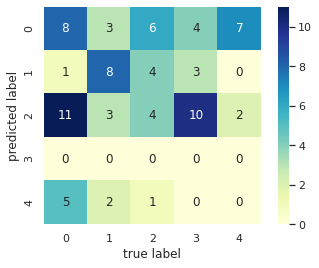

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

target_names = ['Neutral', 'happy', 'negactivate', 'relax', 'sad']

def plot_confus(pred_lable, truelable, target_names):
  print(metrics.classification_report(pred_lable, truelable))
  print('Accuracy: ',metrics.accuracy_score(truelable, pred_lable))

  mat = confusion_matrix(truelable, pred_lable, target_names)
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu")
  # tick_marks = np.arange(len(target_names))
  # plt.xticks(tick_marks, target_names, rotation ='vertical', ha='center')
  # plt.yticks(tick_marks, target_names, rotation ='horizontal', ha='center')
  plt.xlabel('true label')
  plt.ylabel('predicted label'); 

plot_confus(result['predict'], result['class'], target_names)

In [ ]:
# # anger = 0, stress = 1, sadness = 2, happiness = 3, relax = 4
# # anger = 0, disgust = 1, fear = 2, happiness = 3,sadness=4, surprise=5, neutral=6

# ground_truth = df_01_02
# prediction = v_01_02

# final_ans = []
# for i in range(ground_truth.shape[0]): #loop in datafrane
#   start_frame = ground_truth['start_frame'][i]
#   end_frame = ground_truth['end_frame'][i]
#   print('i =', i, ', start_frame : ', start_frame, ', end_frame : ', end_frame)
#   v_02 = prediction.loc[((prediction['frame'] > start_frame) & (prediction['frame'] < end_frame))]
#   emo = v_02[['anger', 'disgust', 'fear', 'happiness','sadness', 'surprise', 'neutral']].values
#   aus = v_02[['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10',
#               'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24', 'AU25',
#               'AU26', 'AU28', 'AU43']].values
#   emo_mean = np.argmax(np.mean(emo, axis=0))
#   print('emo_mean =', emo_mean)
#   final_ans.append(emo_mean)

#   ans = []       
#   for j in range(emo.shape[0]): #loop in start_frame to end_frame
#     pred_emo  = np.argmax(emo[j])
#     ans.append(pred_emo)

#     if pred_emo == 0:
#       print('pred_emo =', 'anger')
#     elif pred_emo == 1:
#       print('pred_emo =', 'disgust')
#     elif pred_emo == 2:
#       print('pred_emo =', 'fear')
#     elif pred_emo == 3:
#       print('pred_emo =', 'happiness')
#     elif pred_emo == 4:
#       print('pred_emo =', 'sadness')      
#     elif pred_emo == 5:
#       print('pred_emo =', 'surprise')      
#     elif pred_emo == 6:
#       print('pred_emo =', 'neutral')      

#   fin = my_mode(ans)
#   print('fin', fin)
#   print('###########################')

  # AU01 = aus[j,0]
  # AU02 = aus[j,1]
  # AU04 = aus[j,2]
  # AU05 = aus[j,3]
  # AU06 = aus[j,4]
  # AU07 = aus[j,5]
  # AU09 = aus[j,6]
  # AU10 = aus[j,7]
  # AU11 = aus[j,8]
  # AU12 = aus[j,9]
  # AU14 = aus[j,10]
  # AU15 = aus[j,11]
  # AU17 = aus[j,12]
  # AU20 = aus[j,13]
  # AU23 = aus[j,14]
  # AU24 = aus[j,15]
  # AU25 = aus[j,16]
  # AU26 = aus[j,17]
  # AU28 = aus[j,18]
  # AU43 = aus[j,19]

# Method2

In [ ]:
ls 'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/download.png'

drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/download.png


In [ ]:
faceDet = cv2.CascadeClassifier("drive/MyDrive/AIHealthcare/AIcare_Phrase1/haarcascades/haarcascade_frontalface_default.xml")
faceDet_two = cv2.CascadeClassifier("drive/MyDrive/AIHealthcare/AIcare_Phrase1/haarcascades/haarcascade_frontalface_alt2.xml")
predictor = dlib.shape_predictor("drive/MyDrive/AIHealthcare/AIcare_Phrase1/model/shape_predictor_68_face_landmarks.dat") 
detector = dlib.get_frontal_face_detector() 
detectordlib = dlib.get_frontal_face_detector()

def detect_faces(img):
  face = faceDet.detectMultiScale(img, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
  face_two = faceDet_two.detectMultiScale(img, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)

  if len(face) == 1:
      facefeatures = face
  elif len(face_two) == 1:
      facefeatures = face_two
  else:
      facefeatures = ""

  for (x, y, w, h) in facefeatures: 
      img = img[y:y+h, x:x+w] 
      try:
          out = cv2.resize(img, (350, 350)) 
      except:
          pass 
  return out

In [ ]:
df = pd.read_csv('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/Anongrat2.csv')
# label_kaggle = (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
pd.unique(df['source'])

array(['01_02', '02_14', '03_29', '04_40', '05_55', '06_81'], dtype=object)

In [ ]:
df = pd.read_csv('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/Test/Anongrat2.csv')
filename = 'Anongrat'
font = cv2.FONT_HERSHEY_SIMPLEX
rowimg = []
label_img = []

df = df.loc[df['source'] == '06_81']
df.reset_index(drop=True, inplace=True)
print('df', df.shape)

for i in tqdm(range(df.shape[0])):
  seqimg = []
  for j in range(df['start_frame'][i], df['end_frame'][i]):
    cap = cv2.VideoCapture('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/emotional_labeling/Anongrat/06_81.mp4')
    cap.set(cv2.CAP_PROP_POS_FRAMES, j)
    success, image = cap.read()
    scale_percent = 30 
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    try:
      faceimg = detect_faces(resized)
    except:
      faceimg = cv2.imread('drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/download.png')
    seqimg.append(faceimg) 
    # cv2_imshow(faceimg)
  rowimg.append(seqimg)
  label_img.append(df['class'][i])

df_06_81 = pd.DataFrame({'img': rowimg, 'label': label_img})
np.save('df_06_81.npy', df_06_81.values)

In [8]:
!cp '/content/df_03_29.npy' 'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/prepare_data/'

In [ ]:
ls 'drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/label_emotion/prepare_data/'

In [ ]:
data = np.load("drive/MyDrive/AIHealthcare/AIcare_Phrase1/data/mid_feame_6c.npy", allow_pickle=True)

In [10]:
!pip install EmoPy

ERROR: Could not find a version that satisfies the requirement EmoPy (from versions: none)
ERROR: No matching distribution found for EmoPy
